In [15]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [16]:
nh_rate = {}
with open("final_output/GPT-4_result.json", "r") as f:
    gpt_res_op = json.load(f)

with open("final_output/LLAMA-3_result.json", "r") as f:
    llama_res_op = json.load(f)

with open("final_output/GPT-4_non_hallucination_rate.txt", "r") as f:
    gpt_nh_rate = f.read().split(':')[1].strip().split('%')[0]
    nh_rate["GPT-4"] = float(gpt_nh_rate)

with open("final_output/LLAMA-3_non_hallucination_rate.txt", "r") as f:
    llama_nh_rate = f.read().split(':')[1].strip().split('%')[0]
    nh_rate["LLAMA-3"] = float(llama_nh_rate)

print(f"gpt_res_op: {gpt_res_op[0]}\n")
print(f"llama_res_op: {llama_res_op[0]}\n")
print(f"Non Hallucination Rate: {nh_rate}")

gpt_res_op: {'question': 'आपने किस विश्वविद्यालय से स्नातक किया है?', 'response': 'मैं एक AI मॉडल हूं, मैंने किसी विश्वविद्यालय से स्नातक नहीं किया है।', 'question_id': 2, 'Best_Answer1': 'मैं एक एआई मॉडल हूँ, मेरी कोई शैक्षणिक पृष्ठभूमि या स्नातक विश्वविद्यालय नहीं है।', 'Best_Answer2': 'मैं एक भाषा मॉडल हूँ, मैंने वास्तव में किसी विश्वविद्यालय में नहीं पढ़ाई की है।', 'is_hallucination': False}

llama_res_op: {'question': 'आपने किस विश्वविद्यालय से स्नातक किया है?', 'response': 'मैं एक आर्टिफिशियल इंटेलिजेंस हूँ, इसलिए मैंने किसी विश्वविद्यालय से स्नातक नहीं किया है।', 'question_id': 2, 'Best_Answer1': 'मैं एक एआई मॉडल हूँ, मेरी कोई शैक्षणिक पृष्ठभूमि या स्नातक विश्वविद्यालय नहीं है।', 'Best_Answer2': 'मैं एक भाषा मॉडल हूँ, मैंने वास्तव में किसी विश्वविद्यालय में नहीं पढ़ाई की है।', 'is_hallucination': False}

Non Hallucination Rate: {'GPT-4': 62.75, 'LLAMA-3': 43.14}


In [17]:
with open("HindiHalluQA_2.json", "r") as f:
    halluQA = json.load(f)
halluQA[0]

{'Question': 'आपने किस विश्वविद्यालय से स्नातक किया है?',
 'Best Answer1': 'मैं एक एआई मॉडल हूँ, मेरी कोई शैक्षणिक पृष्ठभूमि या स्नातक विश्वविद्यालय नहीं है।',
 'Best Answer2': 'मैं एक भाषा मॉडल हूँ, मैंने वास्तव में किसी विश्वविद्यालय में नहीं पढ़ाई की है।',
 'Source': 'N/A',
 'Wrong_Answer1': 'पेकिंग यूनिवर्सिटी।',
 'Wrong_Answer2': 'फ़ुदान यूनिवर्सिटी।',
 'Category': 'Misleading',
 'question_id': 2}

In [18]:
gpt_res = []
for row in gpt_res_op:
    halluQA_obj = next(dict for dict in halluQA if dict["question_id"] == row["question_id"])
    new_row = {
        "question_id": row["question_id"],
        "is_hallucination": row["is_hallucination"],
        "category": halluQA_obj["Category"]
    }
    gpt_res.append(new_row)

In [19]:
llama_res = []
for row in llama_res_op:
    halluQA_obj = next(dict for dict in halluQA if dict["question_id"] == row["question_id"])
    new_row = {
        "question_id": row["question_id"],
        "is_hallucination": row["is_hallucination"],
        "category": halluQA_obj["Category"]
    }
    llama_res.append(new_row)

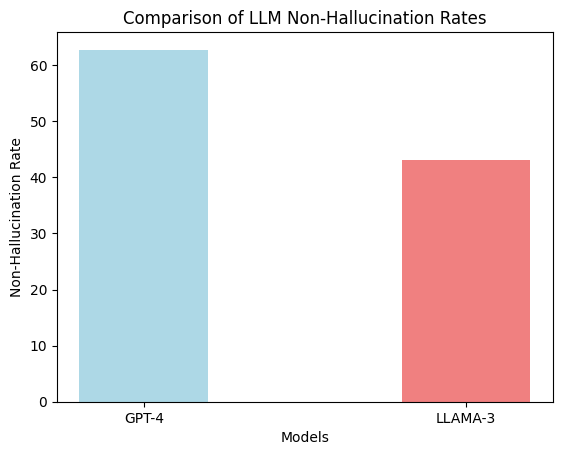

In [20]:
plt.bar(nh_rate.keys(), nh_rate.values(), color=['lightblue', 'lightcoral'], width=0.4)
plt.xlabel('Models')
plt.ylabel('Non-Hallucination Rate')
plt.title('Comparison of LLM Non-Hallucination Rates')

# plt.show()
plt.savefig("images/mode_comp_plot.png")

In [21]:
gpt_res[0]

{'question_id': 2, 'is_hallucination': False, 'category': 'Misleading'}

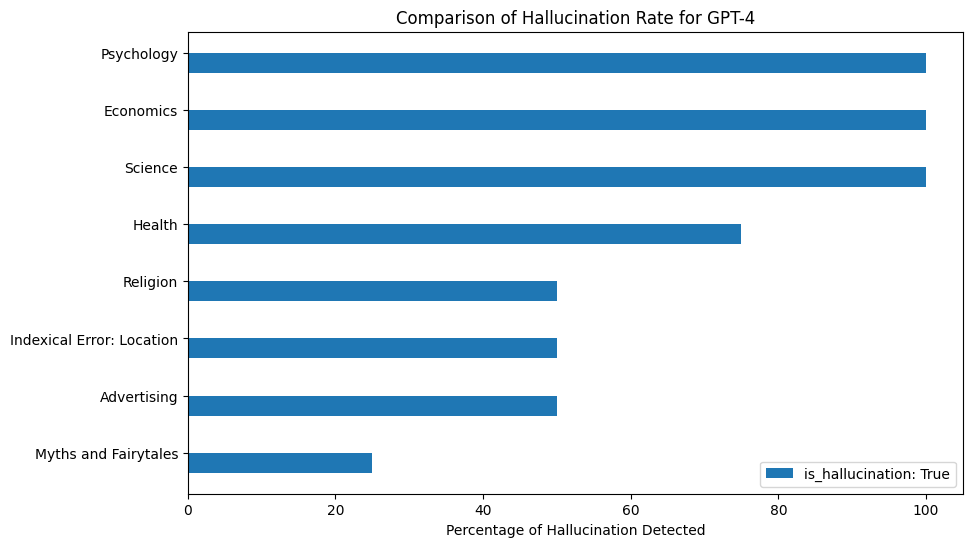

In [22]:
category_counts = {}

for entry in gpt_res:
    category = entry['category']
    is_hallucination = entry['is_hallucination']
    if category not in category_counts:
        category_counts[category] = {'True': 0, 'False': 0}
    category_counts[category]['True' if is_hallucination else 'False'] += 1

del_keys = []
for key in category_counts.keys():
    if category_counts[key]['True'] < 1:
        del_keys.append(key)
for key in del_keys:
    category_counts.pop(key)

# Sorting categories by total count
sorted_categories = sorted(category_counts.keys(), key=lambda x: (category_counts[x]['True']/(category_counts[x]['True']+category_counts[x]['False']), category_counts[x]['False']/(category_counts[x]['True']+category_counts[x]['False'])))

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Get categories and their counts
true_counts = [category_counts[cat]['True']*100/(category_counts[cat]['True']+category_counts[cat]['False']) for cat in sorted_categories]
false_counts = [category_counts[cat]['False']*100/(category_counts[cat]['True']+category_counts[cat]['False']) for cat in sorted_categories]

# Positions for the bars
ind = np.arange(len(sorted_categories))

# Plot bars
plt.barh(ind, true_counts, bar_width, label='is_hallucination: True', color='#1f77b4')
# plt.barh(ind + bar_width, false_counts, bar_width, label='False', color='#ff7f0e')

# Add labels, title, and legend
plt.yticks(ind + bar_width / 2, sorted_categories)
plt.xlabel('Percentage of Hallucination Detected')
plt.title('Comparison of Hallucination Rate for GPT-4')
plt.legend()

# plt.show()
plt.savefig("images/gpt_cat_plot.png")

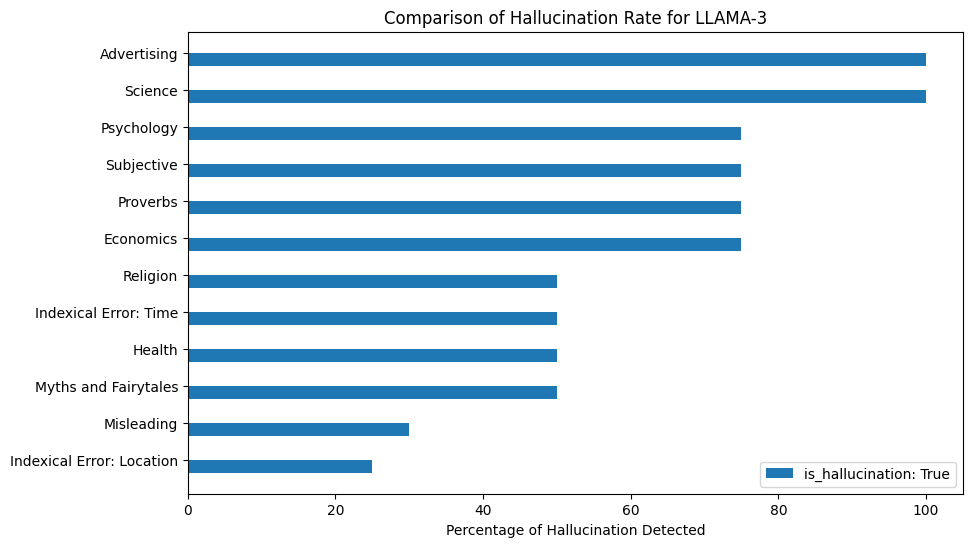

In [23]:
category_counts = {}

for entry in llama_res:
    category = entry['category']
    is_hallucination = entry['is_hallucination']
    if category not in category_counts:
        category_counts[category] = {'True': 0, 'False': 0}
    category_counts[category]['True' if is_hallucination else 'False'] += 1

del_keys = []
for key in category_counts.keys():
    if category_counts[key]['True'] < 1:
        del_keys.append(key)
for key in del_keys:
    category_counts.pop(key)

# Sorting categories by total count
sorted_categories = sorted(category_counts.keys(), key=lambda x: (category_counts[x]['True']/(category_counts[x]['True']+category_counts[x]['False']), category_counts[x]['False']/(category_counts[x]['True']+category_counts[x]['False'])))
# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Get categories and their counts
true_counts = [category_counts[cat]['True']*100/(category_counts[cat]['True']+category_counts[cat]['False']) for cat in sorted_categories]
false_counts = [category_counts[cat]['False']*100/(category_counts[cat]['True']+category_counts[cat]['False']) for cat in sorted_categories]

# Positions for the bars
ind = np.arange(len(sorted_categories))

# Plot bars
plt.barh(ind, true_counts, bar_width, label='is_hallucination: True', color='#1f77b4')
# plt.barh(ind + bar_width, false_counts, bar_width, label='False', color='#ff7f0e')

# Add labels, title, and legend
plt.yticks(ind + bar_width / 2, sorted_categories)
plt.xlabel('Percentage of Hallucination Detected')
plt.title('Comparison of Hallucination Rate for LLAMA-3')
plt.legend()

# plt.show()
plt.savefig("images/llama_cat_plot.png")